In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import linear_model

In [3]:
df = pd.read_excel('../Data/B4/sat.xls')
df

,high_GPA,math_SAT,verb_SAT,comp_GPA,univ_GPA
0,3.45,643,589,3.76,3.52
1,2.78,558,512,2.87,2.91
2,2.52,583,503,2.54,2.40
3,3.67,685,602,3.83,3.47
4,3.24,592,538,3.29,3.47
...,...,...,...,...,...
100,3.76,605,590,3.74,3.64
101,3.49,692,683,3.27,3.42
102,3.07,680,692,3.19,3.25
103,2.19,617,503,2.98,2.76


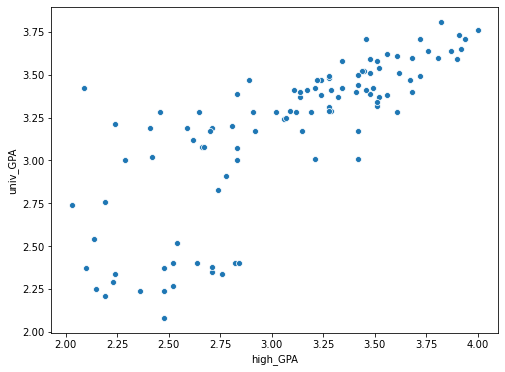

In [10]:
data = df[['high_GPA', 'univ_GPA']]

plt.figure(figsize=(8,6))
sb.scatterplot(data=data, x='high_GPA', y='univ_GPA');

In [26]:
one = np.ones((df['high_GPA'].shape[0],1))
h_GPA = np.array(df['high_GPA']).reshape(-1,1)
A = np.concatenate((h_GPA, one), axis=1)
A[:5,:]

array([[3.45, 1.  ],
       [2.78, 1.  ],
       [2.52, 1.  ],
       [3.67, 1.  ],
       [3.24, 1.  ]])

In [17]:
b = np.array(df['univ_GPA'])

In [11]:
# Cach 1: Gradient Descent
def gradient_descent_2(alpha, x, y, numIterations):
    M     = x.shape[0] # number of samples
    theta = np.ones(2)
    x_T   = x.transpose()
    for iter in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss       = hypothesis - y
        # J          = np.sum(loss ** 2) / (2 * M)  # cost
        # print("iter %s | J: %.3f" % (iter, J))      
        gradient   = np.dot(x_T, loss) / M      
        
        theta    = theta - (alpha * gradient)  # update
    return theta

In [18]:
theta = gradient_descent_2(0.1, A, b, 100000)

In [20]:
print('Regression line by Gradient Descent: \t \t  Univ_GPA = %.4f * High_GPA + %.4f' %(theta[0], theta[1]))

Regression line by Gradient Descent: 	 	  Univ_GPA = 0.6748 * High_GPA + 1.0968


In [22]:
# Cach 2: Pseudo Inverse, giai phuong tinh Ax = b
x = np.linalg.pinv(A) @ b
print('Regression line by Pseudo Inverse: \t \t  Univ_GPA = %.4f * High_GPA + %.4f' %(x[0], x[1]))

Regression line by Pseudo Inverse: 	 	  Univ_GPA = 0.6748 * High_GPA + 1.0968


In [27]:
# Cach 3: Thu vien Scikit-learn Linear Model
regr = linear_model.LinearRegression()
regr.fit(h_GPA,b)

LinearRegression()

In [28]:
print('Regression line by Scikit-learn Lib: \t \t  Univ_GPA = %.4f * High_GPA + %.4f' %(regr.coef_, regr.intercept_))

Regression line by Scikit-learn Lib: 	 	  Univ_GPA = 0.6748 * High_GPA + 1.0968


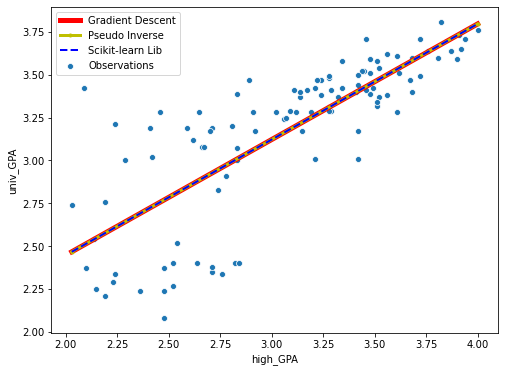

In [38]:
# Visualization
x_visual = np.array([min(h_GPA), max(h_GPA)])

plt.figure(figsize=(8,6))
sb.scatterplot(data=data, x='high_GPA', y='univ_GPA', label='Observations')
plt.plot(x_visual, theta[0]     * x_visual + theta[1]           , '-' , color='r', linewidth=5, label='Gradient Descent')
plt.plot(x_visual, x[0]         * x_visual + x[1]               , '.-', color='y', linewidth=3, label='Pseudo Inverse')
plt.plot(x_visual, regr.coef_   * x_visual + regr.intercept_    , '--', color='b', linewidth=2, label='Scikit-learn Lib')
plt.legend()
plt.show()

In [40]:
high_GPA_test = np.array([2.3, 2.8, 3.3, 3.8])
predicted_univ_GPA = theta[0]     * high_GPA_test + theta[1]
for i in range(predicted_univ_GPA.shape[0]):
    print('Voi High School GPA %.1f, du doan University GPA la: %.1f' %(high_GPA_test[i], predicted_univ_GPA[i]))

Voi High School GPA 2.3, du doan University GPA la: 2.6
Voi High School GPA 2.8, du doan University GPA la: 3.0
Voi High School GPA 3.3, du doan University GPA la: 3.3
Voi High School GPA 3.8, du doan University GPA la: 3.7
